# Markov Chain Monte Carlo.
---
An intuitive approach for generation samples of forex time series based on actual quotes

Date: 02.05.2023
Writer: Sergej Schweizer (@gmail)

### Install

In [9]:
#!pip install numpy pandas plotly

### Import

In [10]:
import numpy as np
import pandas as pd
import plotly.express as px
from numpy import random

### Parameters

In [11]:
# drift coefficent
mu = 0.1
# number of steps
n = 1000000
# time in years
T = 1
# number of simmulations
S = 10
# initial stock price
S0 = 1.70
# volatility
sigma = 0.3

In [3]:
# calc each time step
dt = T / n
# simulation using numpy arrays
St = np.exp(
    (mu - sigma ** 2 / 2) * dt + sigma * np.random.normal(0, np.sqrt(dt), size=(S, n)).T
)
# include array of 1's
#St = np.vstack([np.ones(S), St])
# multiply through by S0 and return the cumulative product of elements along a given simulation path (axis=0).
St = S0 * St.cumprod(axis=0)
df_gbm = pd.DataFrame(St).add_prefix("simulation_")
df_gbm.index.name = "minutes"
df_gbm.sample(n=5)

,simulation_0,simulation_1,simulation_2,simulation_3,simulation_4,simulation_5,simulation_6,simulation_7,simulation_8,simulation_9
minutes,,,,,,,,,,
256645,1.673562,1.523229,2.039899,1.731427,1.676429,1.363559,1.589703,1.469688,1.349189,1.930485
980107,1.349562,1.415301,2.599947,1.625025,2.010379,1.716626,1.446552,1.386167,1.007571,2.697959
678259,1.647727,1.411602,2.065336,1.894702,2.117188,2.155080,1.504722,1.449816,1.227887,2.386470
298522,1.565045,1.509721,1.961527,1.599363,1.654452,1.339008,1.658196,1.626114,1.279621,2.014966
511506,1.900795,1.436977,2.105522,1.765682,1.675367,1.815277,1.772168,1.551977,1.208050,2.311293


<Axes: xlabel='minutes'>

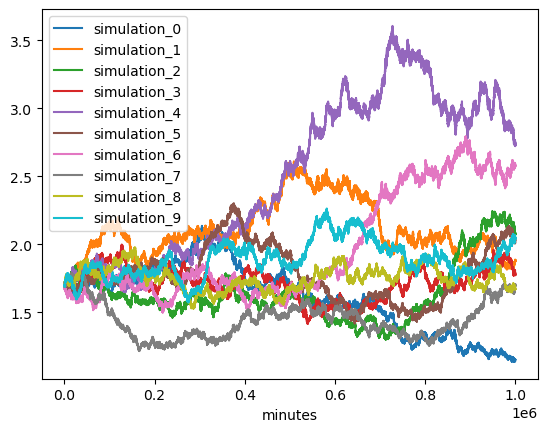

In [11]:
df_gbm.plot()

In [15]:
import this

The Zen of Python, by Tim Peters

Beautiful is better than ugly.
Explicit is better than implicit.
Simple is better than complex.
Complex is better than complicated.
Flat is better than nested.
Sparse is better than dense.
Readability counts.
Special cases aren't special enough to break the rules.
Although practicality beats purity.
Errors should never pass silently.
Unless explicitly silenced.
In the face of ambiguity, refuse the temptation to guess.
There should be one-- and preferably only one --obvious way to do it.
Although that way may not be obvious at first unless you're Dutch.
Now is better than never.
Although never is often better than *right* now.
If the implementation is hard to explain, it's a bad idea.
If the implementation is easy to explain, it may be a good idea.
Namespaces are one honking great idea -- let's do more of those!
